In [1]:
import numpy as np
from matplotlib import pyplot as plt



In [2]:
# Definition of functions

def H0(x):
    m =  1
    w = 0.1
    return 1/2 * m * w * x**2


def Vt(x,t):
    F0 = 1
    w = 0.1
    return F0 * x * np.cos(w * t)

In [3]:
# Plotting functions 

def plot_H0():
    xs = np.linspace(-5,5,100)
    H0s = H0(xs)
    plt.plot(xs,H0s)
    


def plot_Vt():
    xs = np.linspace(-5,5,100)
    ts = np.linspace(0,10,100)
    for t in ts:
        Vts = Vt(xs,t)
        plt.plot(xs,Vts)
    plt.ylim(-2,2)
    plt.xlim(-5,5)
    plt.xlabel("x")
    plt.ylabel("V(x,t)")
    plt.show()

# Main program




Text(0, 0.5, 'V(x,t) + H0(x)')

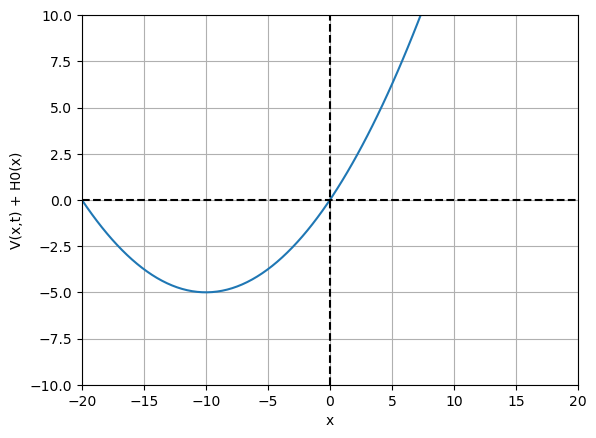

In [4]:
fig, ax = plt.subplots()

xmin = -20
xmax = 20

xs = np.linspace(xmin,xmax,100)

# xs = np.linspace(-5,5,100)


sum = H0(xs) + Vt(xs,0)

# Plotting the total 
ax.plot(xs,sum)
ax.set_ylim(-10,10)
ax.set_xlim(-20,20)

ax.grid()

# ax.violinplot(sum,showmeans=True,showmedians=True)

ax.vlines(0,-10,10,linestyles='dashed',colors='k')
ax.hlines(0,-20,20,linestyles='dashed',colors='k')
ax.set_xlabel("x")
ax.set_ylabel("V(x,t) + H0(x)")



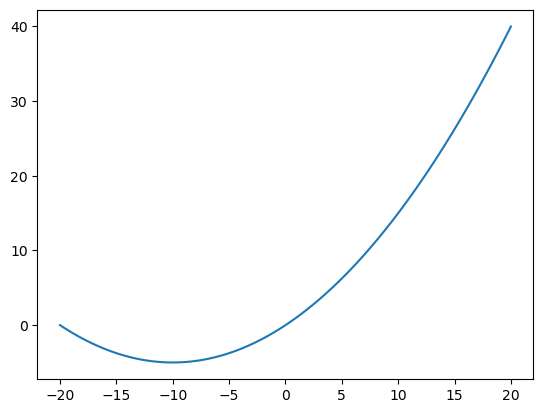

In [5]:
fig, ax = plt.subplots()
# Make animation with time dependence
for t in np.linspace(0,10,100):
    sum = H0(xs) + Vt(xs,t)
    ax.plot(xs,sum)
    plt.pause(0.01)
    ax.clear()
    ax.set_ylim(-10,10)
    ax.set_xlim(-20,20)
    ax.grid()
    ax.vlines(0,-10,10,linestyles='dashed',colors='k')
    ax.hlines(0,-20,20,linestyles='dashed',colors='k')
    ax.set_xlabel("x")
    ax.set_ylabel("V(x,t) + H0(x)")


MovieWriter imagemagick unavailable; using Pillow instead.


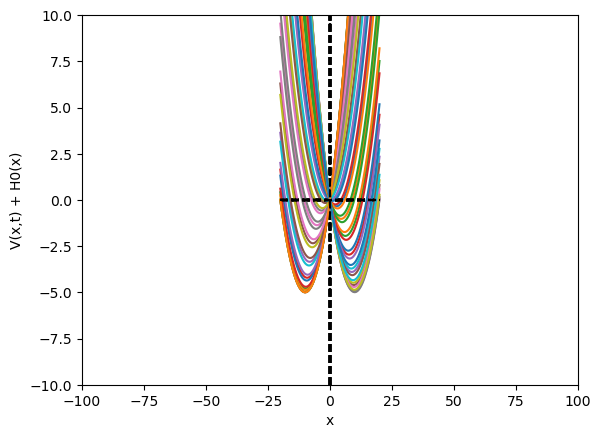

In [6]:
# Make animation with anim
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

def animate(t):
    sum = H0(xs) + Vt(xs,t)
    ax.plot(xs,sum)
    ax.set_ylim(-10,10)
    ax.set_xlim(-100,100)
    # ax.grid()
    ax.vlines(0,-10,10,linestyles='dashed',colors='k')
    ax.hlines(0,-20,20,linestyles='dashed',colors='k')
    ax.set_xlabel("x")
    ax.set_ylabel("V(x,t) + H0(x)")

anim = FuncAnimation(fig,animate,frames=np.linspace(0,100,50),interval=10)
anim.save("animation.gif",writer='imagemagick')




In [14]:
# Now make the animation with the expectation value of x 

# The expectation value of x is given by

# def expectation_x(t):
#     w = 0.1
#     return np.sqrt(2) * np.cos(w * t)


def expectation_x(t):
    w = 0.1
    F0 = 1
    return 2 * F0 * np.sin(w * t)**2

MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x0000024171A7D790> (for post_execute):


TypeError: expectation_x() takes 1 positional argument but 2 were given

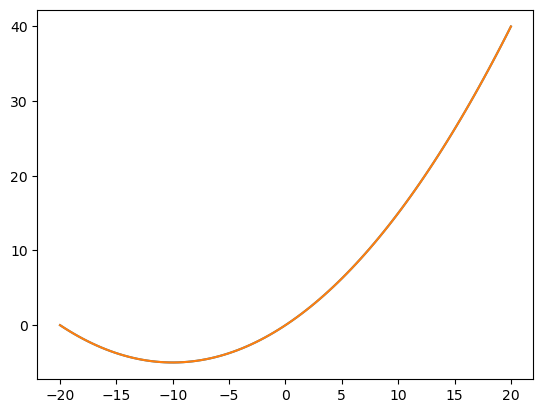

In [15]:
# Animate the expectation value of x

fig, ax = plt.subplots()

def animate(t):
    sum = H0(xs) + Vt(xs,t)
    ax.plot(xs,sum)
    ax.plot(expectation_x(xs,t),sum)
    ax.set_ylim(-10,10)
    ax.set_xlim(-100,100)
    # ax.grid()
    ax.vlines(0,-10,10,linestyles='dashed',colors='k')
    ax.hlines(0,-20,20,linestyles='dashed',colors='k')
    ax.set_xlabel("x")
    ax.set_ylabel("V(x,t) + H0(x)")

anim = FuncAnimation(fig,animate,frames=np.linspace(0,100,50),interval=10)
anim.save("animation_x.gif",writer='imagemagick')


In [7]:
def harmonic_squeezed(x, t):
    m = 1
    w = 0.1
    eps = 1
    return 1/2 * m * w**2 * x**2 + 1/2 * m * w**2 * eps * np.cos(w * t) * x**2

MovieWriter imagemagick unavailable; using Pillow instead.


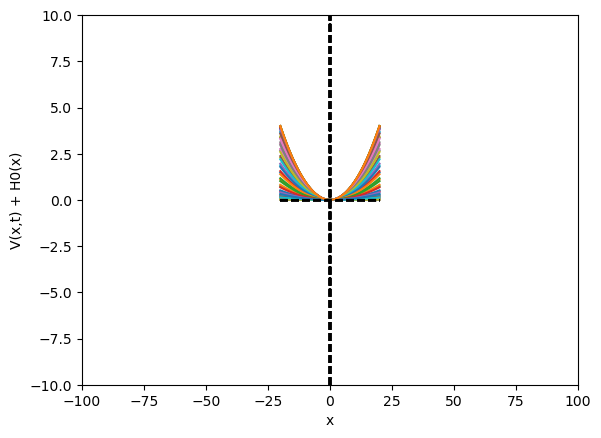

In [8]:
# Make animation with anim
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

def animate(t):
    sum = harmonic_squeezed(xs,t)
    ax.plot(xs,sum)
    ax.set_ylim(-10,10)
    ax.set_xlim(-100,100)
    # ax.grid()
    ax.vlines(0,-10,10,linestyles='dashed',colors='k')
    ax.hlines(0,-20,20,linestyles='dashed',colors='k')
    ax.set_xlabel("x")
    ax.set_ylabel("V(x,t) + H0(x)")

anim = FuncAnimation(fig,animate,frames=np.linspace(0,100,50),interval=10)
anim.save("animation.gif",writer='imagemagick')





In [9]:
# Runge Kutta method

def RK4(f,x0,t0,tf,dt):
    # f is a function that takes two arguments x and t
    # x0 is the initial value of x
    # t0 is the initial time
    # tf is the final time
    # dt is the time step
    t = t0
    x = x0
    ts = [t0]
    xs = [x0]
    while t < tf:
        k1 = f(x,t)
        k2 = f(x + dt/2 * k1,t + dt/2)
        k3 = f(x + dt/2 * k2,t + dt/2)
        k4 = f(x + dt * k3,t + dt)
        x = x + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
        t = t + dt
        ts.append(t)
        xs.append(x)
    return ts,xs

# Plotting the trajectory
